In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
# import missingno as msno
from sklearn.utils import shuffle 
# from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [2]:
# columns_to_drop = ['id', 'price', 'data_source']
# columns_to_drop = ['brand_name', 'model_name', 'type_name', 'color_name', 'transmission_name', 'condition_name', 'province_name', 'region_name']

# Load and split train data
train_data = pd.read_csv('train_data.csv')

# train_data = train_data.drop(columns=columns_to_drop, axis=1)

# Load and split test data
test_data = pd.read_csv('test_data.csv')

In [3]:
train_data.shape

(575736, 22)

In [4]:
train_data.head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,...,data_source,age,brand_name,model_name,type_name,color_name,transmission_name,condition_name,province_name,region_name
0,a01969a8-6cd8-4cb4-a572-e51467d32fe4,0,73,186,9,2017,20000,0,1,475000000.0,...,OLX,7,Audi,A3,1.2 SPORTBACK TFSI,Merah,AUTOMATIC,USED_CAR,Jakarta D.K.I.,Indonesia
1,08b61c87-6b06-48d2-b90b-ca128484684c,0,73,186,6,2017,65000,0,1,320000000.0,...,OLX,7,Audi,A3,1.2 SPORTBACK TFSI,Kuning,AUTOMATIC,USED_CAR,Jakarta D.K.I.,Indonesia
2,9c501c4d-26fa-406e-a2e5-0b30d006c31f,0,73,198,9,2017,10000,0,1,450000000.0,...,OLX,7,Audi,A3,1.2 TFSI SPORTBACK,Merah,AUTOMATIC,USED_CAR,Jakarta D.K.I.,Indonesia
3,17603f16-fbff-41d4-b61b-285633dcd2de,0,73,198,9,2023,20000,0,1,510000000.0,...,OLX,1,Audi,A3,1.2 TFSI SPORTBACK,Merah,AUTOMATIC,USED_CAR,Jakarta D.K.I.,Indonesia
4,27baaa5f-325b-4b00-961d-ea8fd83e70cb,0,73,198,11,2017,35000,0,1,334375000.0,...,OLX,7,Audi,A3,1.2 TFSI SPORTBACK,Putih,AUTOMATIC,USED_CAR,Jakarta D.K.I.,Indonesia


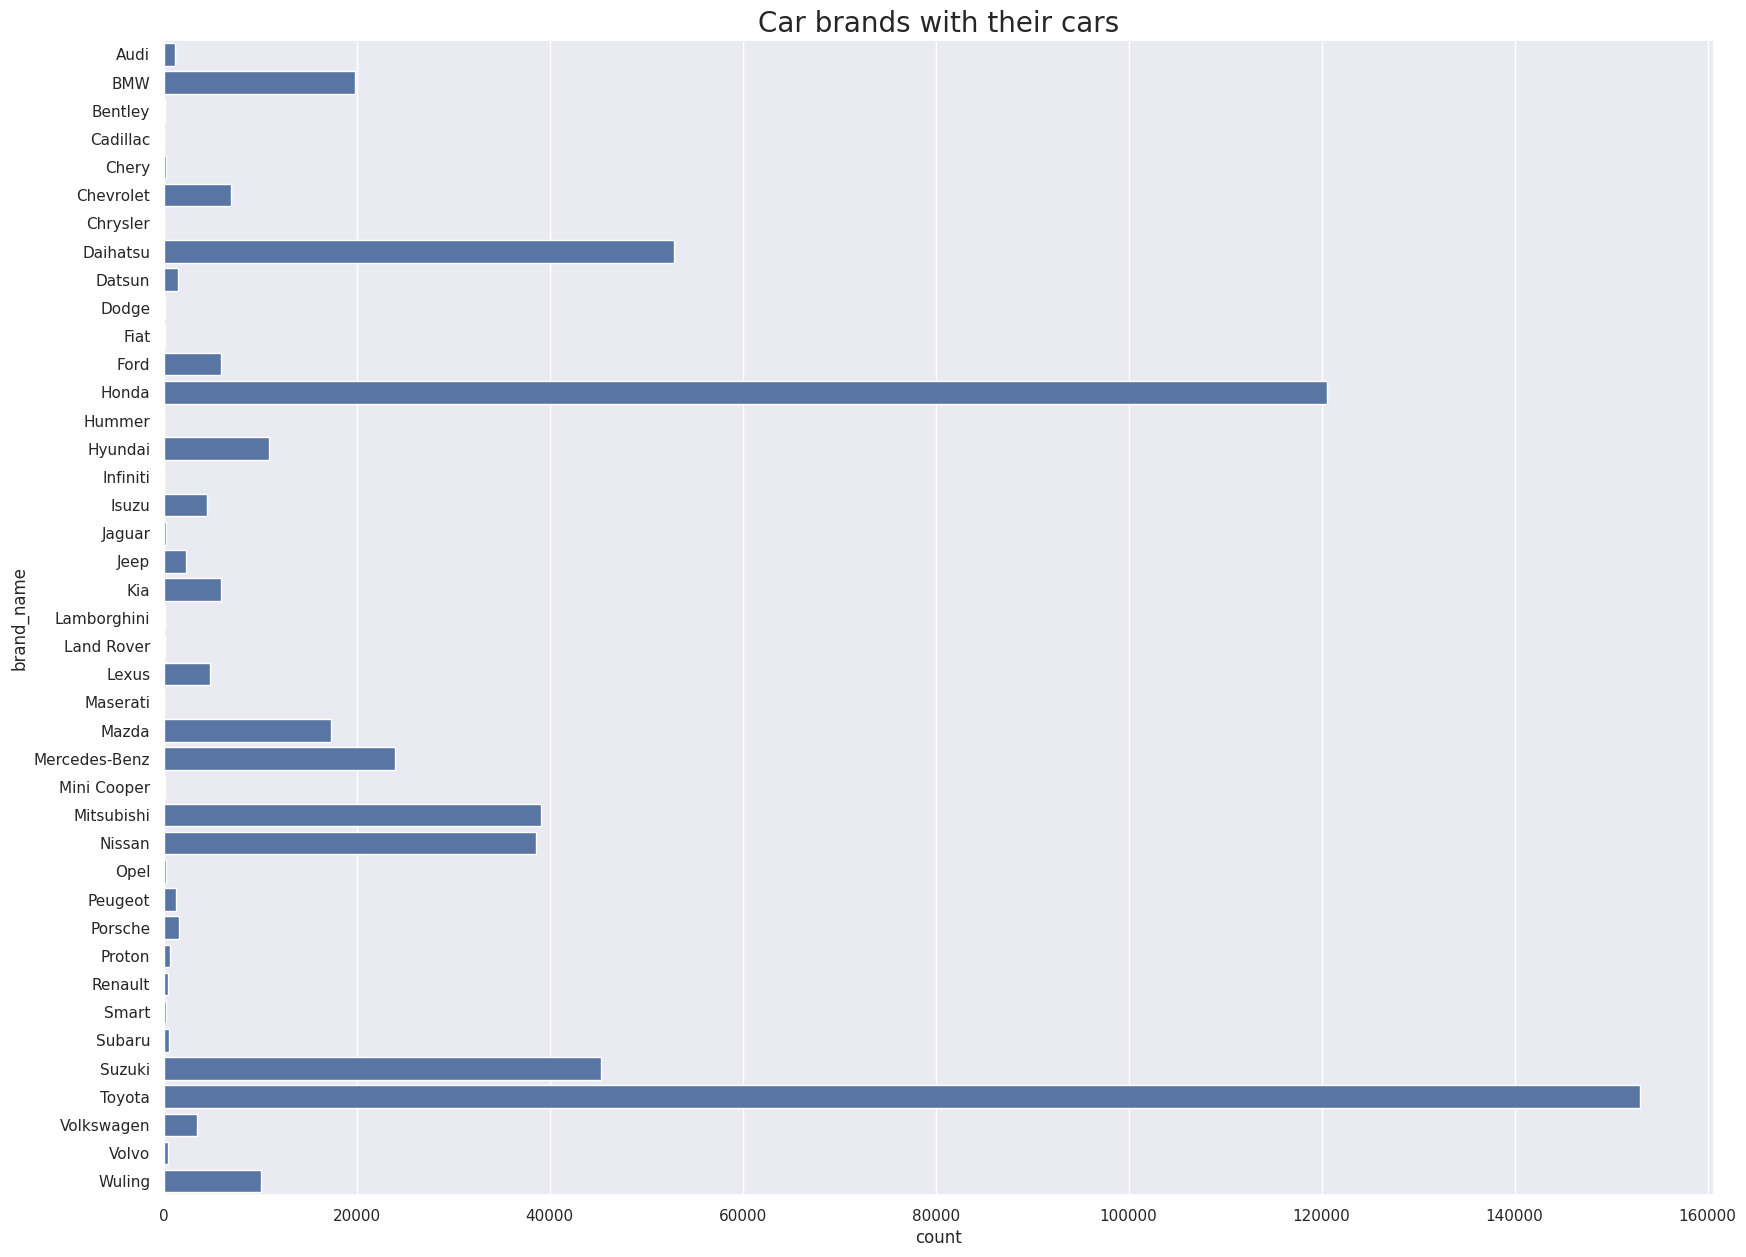

In [5]:
plt.figure(figsize = (20, 15))
sns.countplot(y = train_data.brand_name)
plt.title("Car brands with their cars", fontsize = 20)
plt.show()

Text(0, 0.5, 'frequency')

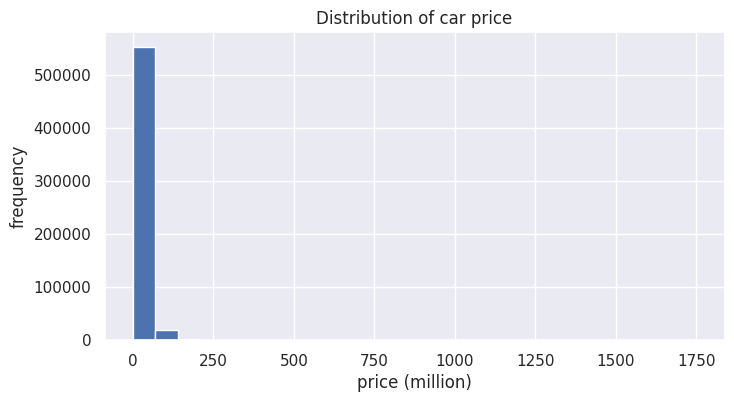

In [6]:
import matplotlib.pyplot as plt

train_data['price'].div(10000000).plot.hist(bins=25, figsize=(8,4))
plt.title('Distribution of car price')
plt.xlabel('price (million)')
plt.ylabel('frequency')

### More checking on na value

In [7]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [8]:
train_data.isna().sum()

id                   0
brand                0
model                0
type                 0
color                0
year                 0
mileage              0
transmission         0
condition            0
price                0
province             0
region               0
data_source          0
age                  0
brand_name           0
model_name           0
type_name            0
color_name           0
transmission_name    0
condition_name       0
province_name        0
region_name          0
dtype: int64

In [9]:
test_data.isna().sum()

id                   0
brand                0
model                0
type                 0
color                0
year                 0
mileage              0
transmission         0
condition            0
price                0
province             0
region               0
data_source          0
age                  0
brand_name           0
model_name           0
type_name            0
color_name           0
transmission_name    0
condition_name       0
province_name        0
region_name          0
dtype: int64

In [10]:
# Save train_df to CSV
train_data.to_csv('train_data.csv', index=False)

# Save test_df to CSV
test_data.to_csv('test_data.csv', index=False)

print("Train and test data saved to CSV files.")

Train and test data saved to CSV files.
